In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from netconf import netconf

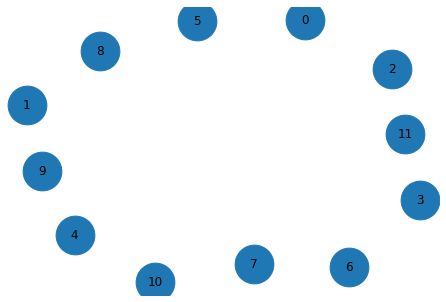

In [26]:
# @title Make demo graph
# Choose your graph parameters - you can always come back once you understand what these mean
nodes = 12 # Total number of nodes
zeros = 2 # Nodes in class 0
ones = 2 # Nodes in class 1
neighbours = 2 # Edges will be created to this number of nearest neighbours
cmap = 'RdYlGn_r' # No need to change unless you're fancying some groovy colours today

# Create a graph and add your nodes
G = nx.Graph() # Initialise the graph - nodes have got to go somewhere
G.add_nodes_from(range(nodes)) # Nodes going on
pos = nx.spring_layout(G) # Fix the positions of the nodes
nx.draw(G, pos=pos, node_size=1500, with_labels=True) # Let's have a look

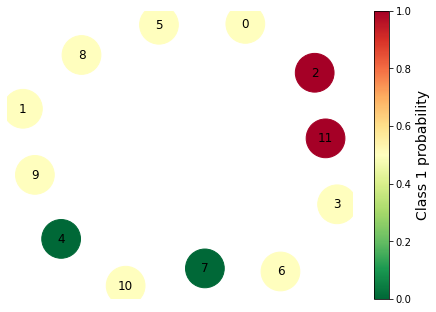

In [27]:
# @title Allocate classes
"""
Good start, now let's add our prior knowledge.

We'll randomly assign which nodes are to be in classes 0 and 1, with the rest
being ignorant - i.e. 0.5 prior belief.
"""
randomise_priors = False
if randomise_priors:
    priors = [1]*ones+[0]*zeros+[0.5]*(nodes-(ones+zeros))
    np.random.shuffle(priors)
else:
    priors = [0.5, 0.5, 1, 0.5, 0, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 1]

# Let's draw it again
nx.draw(G, pos=pos, node_size=1500, with_labels=True, node_color=priors, cmap=cmap)

# Don't worry about these, it's just adding a colorbar to look pretty
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = 0, vmax=1))
c = plt.colorbar(sm)
c.set_label('Class 1 probability', fontsize=14)

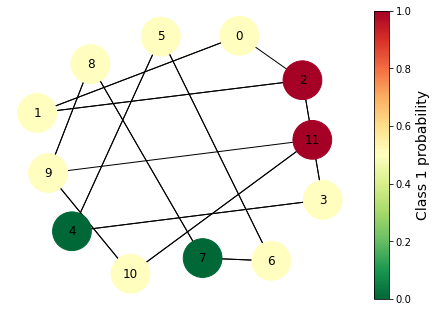

In [28]:
# @title Allocate edges
"""
We have our prior beliefs! Let's get some edges involved.

kneighbours_graph is a function which finds the nearest neighbours to each
node according to it's value. The values of our nodes are 0 to n (n being how
many nodes you chose) as displayed on each graph
"""
# Get edges
values = np.array(range(nodes)).reshape(-1,1) # Get our values in a vector
edges = kneighbors_graph(values, neighbours, mode='connectivity',include_self=False)

# Just a matrix re-shuffle to make the output usable, don't panic
edges = np.array(edges.nonzero()).reshape(2,-1).transpose()

# Let's take another look
nx.draw(G, pos=pos, node_size=1500, with_labels=True, node_color=priors, cmap=cmap, edgelist=edges)
c = plt.colorbar(sm)
c.set_label('Class 1 probability', fontsize=14)

13  iterations


Text(0.05, 1.07, 'b')

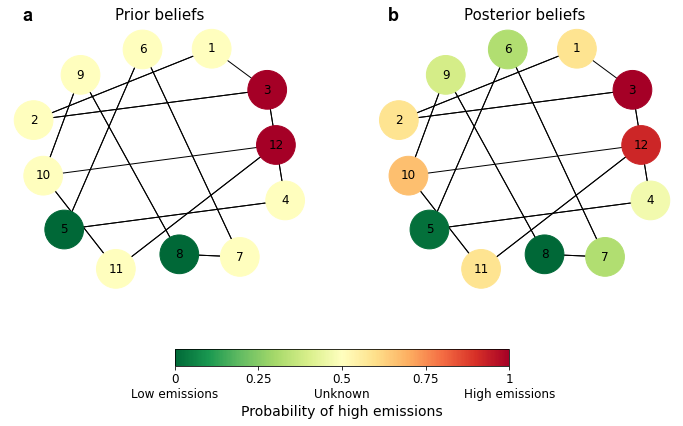

In [29]:
# @title Propagate beliefs
"""
Ok, here we are, let's fire up the beast!

Netconf is implemented in the netconf.py file, feel free to have a browse but there's
not much need unless you're an equations enthusiast.
"""
priors = np.array(priors).reshape(-1,1) # Just a little matrix shimmy
posteriors, _ = netconf(edges,priors, verbose=False) # Here it goes!

"""
Well, wasn't that exhilirating!
Ok, now we'll plot up the priors against the posteriors to see what actually went
down.
"""
fig, axs = plt.subplots(1, 2, figsize=[12,7], facecolor='white') # Initialise a figure
c = fig.colorbar(sm, ax=axs.ravel().tolist(), orientation = 'horizontal', shrink=0.5)
c.ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
c.ax.set_xticklabels(['0\nLow emissions', '0.25', '0.5\nUnknown', '0.75', '1\nHigh emissions'], fontsize=12)
c.set_label('Probability of high emissions', fontsize=14)
label_dict = {i: i+1 for i in range(nodes)}

# Let's draw the prior beliefs
nx.draw(G, pos=pos, node_size=1500, labels=label_dict, node_color=priors, cmap=cmap, edgelist=edges, ax=axs[0])
axs[0].set_title('Prior beliefs', fontsize=15)
# c = plt.colorbar(sm, ax=axs[0])
# c.ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
# c.ax.set_yticklabels(['0 - Company A', '0.25', '0.5 - Unknown', '0.75', '1 - Company B'], fontsize=12)
# c.set_label('Probability of company B ownership', fontsize=14)

# And now the posterior beliefs
nx.draw(G, pos=pos, node_size=1500, labels=label_dict, node_color=posteriors, cmap=cmap, edgelist=edges, ax=axs[1])
axs[1].set_title('Posterior beliefs', fontsize=15)

h, w = 0.05, 1.07
axs[0].text(h, w, 'a', transform = axs[0].transAxes, fontsize=18, fontweight = 'bold', color = 'black', va='top', ha='left', **{'fontname':'Arial'})
axs[1].text(h, w, 'b', transform = axs[1].transAxes, fontsize=18, fontweight = 'bold', color = 'black', va='top', ha='left', **{'fontname':'Arial'})

In [31]:
fig.savefig('C:/Users\lukec\PycharmProjects\emissions-tracking-conda\emissions-tracking\outputs\GRL_for_IE/bp.png', bbox_inches='tight', dpi=150)